In [10]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
import numpy as np
from numpy import asarray
import pandas as pd
import math
import seaborn as sns  #heat map
import glob # batch processing of images


import matplotlib.font_manager as fm
import random
import sys
import os

# from sklearn.datasets import make_regression
# import tensorflow as tf
# from sklearn.metrics import confusion_matrix    #confusion matrix
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
# print(font_names)

from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout
from IPython.display import display, update_display
from ipyfilechooser import FileChooser


#Sklearn model saving and loading
from joblib import dump, load

if '../../' not in sys.path:
    sys.path.append('../../')

from aimos.spectral_datasets.THz_datasets import THz_data

from aimos.misc.utils import simple_plotter


#Set random seed
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
# tf.random.set_seed(42)  
# tf.random.get_global_generator().reset_from_seed(42)
np.random.seed(42)
random.seed(42)

from oneida import THz_mixture_data
from oneida_utils import concentrations_to_one_hot_encode, create_mixture_names

from stats import stats
stats(n_compounds=8)

Total 1-C combinations: 8
Total 2-C combinations: 28
Total 3-C combinations: 56
Total 4-C combinations: 70
Total 5-C combinations: 56
Total 6-C combinations: 28
Total 7-C combinations: 8
Total 8-C combinations: 1
Total combinations: 255


In [11]:
# initialize
TAAT = 0.001 
ASAT=0.01
RSAT=0.05

m = THz_mixture_data(resolution=0.016, pressure='1 Torr', verbosity=False)
m.initiate_THz_mixture_data(TAAT = TAAT, 
                               ASAT=ASAT, 
                               RSAT=RSAT)

reduced_labels = m.labels
reduced_labels.remove('')
reduced_labels.remove(' ')
reduced_labels.remove('Diluent')
print('reduced_labels', reduced_labels)


# data_filename = "datasets/TSMCN-5-L-229_DV_04-09-2022_time_22-26-37.pkl"
data_filename = "datasets/TSMCN-8-L-229_DV__TAAT_0.001_ASAT_0.01_RSAT_0.05_21-09-2022_time_18-53-02.pkl"
DV = pd.read_pickle(data_filename)
y = DV['y'].to_numpy()
mixture_names = DV['mixture_names'].to_numpy()
y_concentrations = DV[['y_c0', 'y_c1', 'y_c2','y_c3', 'y_c4', 'y_c5', 'y_c6', 'y_c7']].to_numpy()
X = DV.drop(['y','mixture_names', 'y_c0', 'y_c1', 'y_c2','y_c3', 'y_c4', 'y_c5', 'y_c6', 'y_c7'],axis=1).to_numpy()

final_neuron_number = np.unique(y, axis=0).shape[0]
print('Number of neurons in the final layer :', final_neuron_number)

print('labels from class:', m.labels)

Components :  [[0 1 2 3 4 5 6 7 8]]
Components shape :  (1, 9)
TAAT =  0.001
ASAT =  0.01
RSAT =  0.05
reduced_labels ['$C_2H_5OH$', '$CH_3CHO$', '$CH_3Cl$', '$CH_3CN$', '$CH_3OH$', '$H_2CO$', '$HCOOH$', '$HNO_3$']
Number of neurons in the final layer : 255
labels from class: ['$C_2H_5OH$', '$CH_3CHO$', '$CH_3Cl$', '$CH_3CN$', '$CH_3OH$', '$H_2CO$', '$HCOOH$', '$HNO_3$']


In [13]:
DV

,0,1,2,3,4,5,6,7,8,9,...,y,mixture_names,y_c0,y_c1,y_c2,y_c3,y_c4,y_c5,y_c6,y_c7
4570,0.000222,0.000245,0.000290,0.000106,0.000158,0.000200,0.000282,0.002158,0.000927,0.001697,...,0,$CH_3CHO$,0.0,0.044223,0.0,0.0,0.0,0.0,0.0,0.0
8354,0.001494,0.001647,0.001950,0.000713,0.001060,0.001342,0.001893,0.014506,0.006231,0.011405,...,0,$CH_3CHO$,0.0,0.297247,0.0,0.0,0.0,0.0,0.0,0.0
5384,0.000217,0.000239,0.000283,0.000104,0.000154,0.000195,0.000275,0.002107,0.000905,0.001657,...,0,$CH_3CHO$,0.0,0.043174,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.003738,0.004119,0.004878,0.001784,0.002650,0.003357,0.004734,0.036282,0.015584,0.028527,...,0,$CH_3CHO$,0.0,0.74348,0.0,0.0,0.0,0.0,0.0,0.0
9857,0.002077,0.002289,0.002711,0.000992,0.001473,0.001866,0.002631,0.020165,0.008661,0.015855,...,0,$CH_3CHO$,0.0,0.413203,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20433,0.006499,0.003193,0.002474,0.002159,0.002034,0.001885,0.002736,0.003396,0.002412,0.001628,...,254,$H_2CO$+$HNO_3$,0.0,0.0,0.0,0.0,0.0,0.087276,0.0,0.157511
55552,0.007020,0.003445,0.002669,0.002329,0.002194,0.002034,0.002952,0.003664,0.002602,0.001831,...,254,$H_2CO$+$HNO_3$,0.0,0.0,0.0,0.0,0.0,0.326241,0.0,0.169925
14628,0.006095,0.002995,0.002320,0.002025,0.001908,0.001768,0.002566,0.003186,0.002262,0.001524,...,254,$H_2CO$+$HNO_3$,0.0,0.0,0.0,0.0,0.0,0.07299,0.0,0.147735
43029,0.002006,0.000985,0.000763,0.000666,0.000627,0.000581,0.000844,0.001047,0.000744,0.000518,...,254,$H_2CO$+$HNO_3$,0.0,0.0,0.0,0.0,0.0,0.077702,0.0,0.048572


In [14]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(mixture_names)

mixture_types=le.classes_
print(mixture_types)

['$CH_3CHO$' '$CH_3CHO$+$CH_3CN$' '$CH_3CHO$+$CH_3CN$+$CH_3OH$'
 '$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$'
 '$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HCOOH$+$HNO_3$'
 '$CH_3CHO$+$CH_3CN$+$CH_3OH$+$HNO_3$'
 '$CH_3CHO$+$CH_3CN$+$CH_3OH$+$H_2CO$'
 '$CH_3CHO$+$CH_3CN$+$CH_3OH$+$H_2CO$+$HCOOH$'
 '$CH_3CHO$+$CH_3CN$+$CH_3OH$+$H_2CO$+$HCOOH$+$HNO_3$'
 '$CH_3CHO$+$CH_3CN$+$CH_3OH$+$H_2CO$+$HNO_3$'
 '$CH_3CHO$+$CH_3CN$+$HCOOH$' '$CH_3CHO$+$CH_3CN$+$HCOOH$+$HNO_3$'
 '$CH_3CHO$+$CH_3CN$+$HNO_3$' '$CH_3CHO$+$CH_3CN$+$H_2CO$'
 '$CH_3CHO$+$CH_3CN$+$H_2CO$+$HCOOH$'
 '$CH_3CHO$+$CH_3CN$+$H_2CO$+$HCOOH$+$HNO_3$'
 '$CH_3CHO$+$CH_3CN$+$H_2CO$+$HNO_3$' '$CH_3CHO$+$CH_3Cl$'
 '$CH_3CHO$+$CH_3Cl$+$CH_3CN$' '$CH_3CHO$+$CH_3Cl$+$CH_3CN$+$CH_3OH$'
 '$CH_3CHO$+$CH_3Cl$+$CH_3CN$+$CH_3OH$+$HCOOH$'
 '$CH_3CHO$+$CH_3Cl$+$CH_3CN$+$CH_3OH$+$HCOOH$+$HNO_3$'
 '$CH_3CHO$+$CH_3Cl$+$CH_3CN$+$CH_3OH$+$HNO_3$'
 '$CH_3CHO$+$CH_3Cl$+$CH_3CN$+$CH_3OH$+$H_2CO$'
 '$CH_3CHO$+$CH_3Cl$+$CH_3CN$+$CH_3OH$+$H_2CO$+$HCOOH$'
 '$CH_3CHO$+$CH_3Cl$+$CH_3CN

In [15]:
DV[DV['mixture_names'] == '$CH_3CHO$+$CH_3Cl$+$CH_3CN$+$CH_3OH$ ']

,0,1,2,3,4,5,6,7,8,9,...,y,mixture_names,y_c0,y_c1,y_c2,y_c3,y_c4,y_c5,y_c6,y_c7


selected mixture type : $CH_3CHO$
dataframe index 8354
 $C_2H_5OH$ 0.0 
 $CH_3CHO$ 0.2972473471045163 
 $CH_3Cl$ 0.0 
 $CH_3CN$ 0.0 
 $CH_3OH$ 0.0 
 $H_2CO$ 0.0 
 $HCOOH$ 0.0 
 $HNO_3$ 0.0


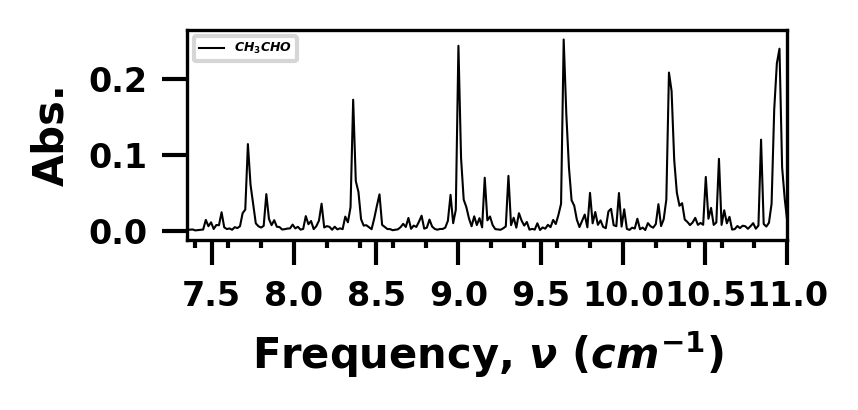

In [16]:
def plotter(obj):
    sel_mix_type = dropdown.value
    print('selected mixture type :', dropdown.value)
#     sel_mix_type = '$CH_3CHO$'
    sampled_DV = DV[DV['mixture_names'] == sel_mix_type]
    sampled_DV

    idx = slider.value

    print('dataframe index', sampled_DV.index[idx])
#     print('mixture y label index', sampled_DV.y[idx])

    absorbances_NP = sampled_DV.drop(labels = ['y', 'mixture_names', 'y_c0', 'y_c1', 'y_c2', 'y_c3', 'y_c4', 'y_c5',
       'y_c6', 'y_c7'], axis = 1).to_numpy()
    concentrations_NP= sampled_DV[['y_c0', 'y_c1', 'y_c2', 'y_c3', 'y_c4', 'y_c5',
       'y_c6', 'y_c7']].to_numpy()

    print(f' $C_2H_5OH$ {concentrations_NP[idx][0]} \n $CH_3CHO$ {concentrations_NP[idx][1]} \n $CH_3Cl$ {concentrations_NP[idx][2]} \n $CH_3CN$ {concentrations_NP[idx][3]} \n $CH_3OH$ {concentrations_NP[idx][4]} \n $H_2CO$ {concentrations_NP[idx][5]} \n $HCOOH$ {concentrations_NP[idx][6]} \n $HNO_3$ {concentrations_NP[idx][7]}')


    simple_plotter(m.frequencies,absorbances_NP[idx],linewidth=0.5,color='black',label=mixture_names[idx], 
                       majorsize=6,minorsize=2,width=1, labelsize=8,legendsize=3, legendloc=2,  
                       labelpad=4,fontsize='medium',fontweight='bold',
                      xmajormplloc=0.5,xminormplloc=0.2, tickdirection='out')

    
    
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=69,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

button = widgets.Button(
    description='Plot',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    
)

dropdown = widgets.Dropdown(options=mixture_types, description='Type:', disabled=False)


display(VBox([dropdown, slider, button]))

button.on_click(plotter)

dataframe index 4570
 $C_2H_5OH$ 0.0 
 $CH_3CHO$ 0.04422337575846169 
 $CH_3Cl$ 0.0 
 $CH_3CN$ 0.0 
 $CH_3OH$ 0.0 
 $H_2CO$ 0.0 
 $HCOOH$ 0.0 
 $HNO_3$ 0.0


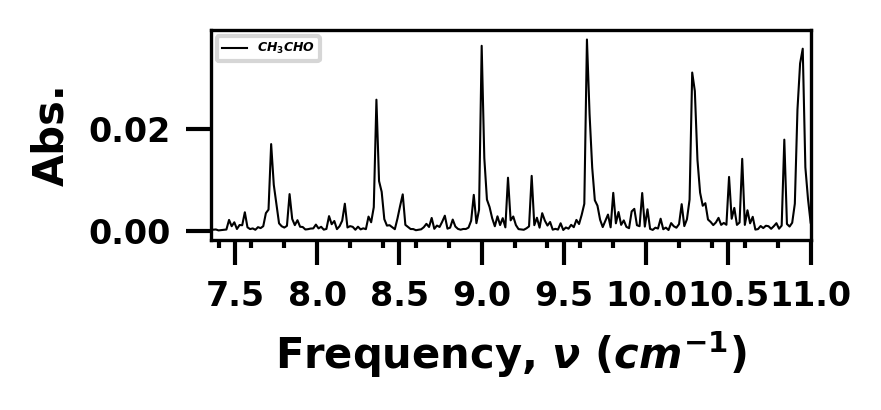

In [164]:
sel_mix_type = '$CH_3CHO$'
sampled_DV = DV[DV['mixture_names'] == sel_mix_type]
sampled_DV

idx = 0

print('dataframe index', sampled_DV.index[idx])

absorbances_NP = sampled_DV.drop(labels = ['y', 'mixture_names', 'y_c0', 'y_c1', 'y_c2', 'y_c3', 'y_c4', 'y_c5',
   'y_c6', 'y_c7'], axis = 1).to_numpy()
concentrations_NP= sampled_DV[['y_c0', 'y_c1', 'y_c2', 'y_c3', 'y_c4', 'y_c5',
   'y_c6', 'y_c7']].to_numpy()

print(f' $C_2H_5OH$ {concentrations_NP[idx][0]} \n $CH_3CHO$ {concentrations_NP[idx][1]} \n $CH_3Cl$ {concentrations_NP[idx][2]} \n $CH_3CN$ {concentrations_NP[idx][3]} \n $CH_3OH$ {concentrations_NP[idx][4]} \n $H_2CO$ {concentrations_NP[idx][5]} \n $HCOOH$ {concentrations_NP[idx][6]} \n $HNO_3$ {concentrations_NP[idx][7]}')


simple_plotter(m.frequencies,absorbances_NP[idx],linewidth=0.5,color='black',label=mixture_names[idx], 
                   majorsize=6,minorsize=2,width=1, labelsize=8,legendsize=3, legendloc=2,  
                   labelpad=4,fontsize='medium',fontweight='bold',
                  xmajormplloc=0.5,xminormplloc=0.2, tickdirection='out')

